### Импорт библиотек 

In [1]:
import pandas as pd 
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
warnings.simplefilter('ignore')

### Импорт данных

In [2]:
df = pd.read_csv("cowid-covid-data.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### Описание столбцов

iso_code - код страны

continent - континент

location - страна

total_cases - всего случаев

new_cases - новых случаев

new_cases_smoothed - новые дела сглажены

total_deaths - всего смертей

new_deaths - новых смертей

new_deaths_smoothed - новые смерти сглажены

total_cases_per_million - всего случаев на миллион

new_cases_per_million - новых случаев на миллион

new_cases_smoothed_per_million - число новых дел, сглаженных на миллион

total_deaths_per_million - всего смертей на миллион
new_deaths_per_million - новый смертей на миллион

new_deaths_smoothed_per_million - число смертей, сглаженных на миллион

reproduction_rate - скорость размножения

icu_patients - пациенты отделения интенсивной терапии

icu_patients_per_million - пациенты отделения интенсивной терапии на миллион

hosp_patients - госпитализированных пациентов

hosp_patients_per_million - госпитализированных пациентов на миллион

weekly_icu_admissions - еженедельные госпитализации в отделение интенсивной терапии

weekly_icu_admissions_per_million - еженедельные госпитализации в отделение интенсивной терапии на миллион

weekly_hosp_admissions - еженедельные госпитализации

weekly_hosp_admissions_per_million - еженедельные госпитализации на миллион

new_tests - новых тестов

total_tests - всего тестов

total_tests_per_thousand - всего тестов на тысячу

new_tests_per_thousand - новых тестов на тысячу

new_tests_smoothed - новые тесты сглажены

new_tests_smoothed_per_thousand - новые тесты сглажены на тысячу

positive_rate - положительный показатель

tests_per_case - тестов на случай

tests_units - единицы измерения тестов

total_vaccinations - всего прививок

people_vaccinated - людей вакцинировано

people_fully_vaccinated - полностью вакцинированных людей

total_boosters - всего помощников

new_vaccinations - новые прививки

new_vaccinations_smoothed - новые прививки сглажены

total_vaccinations_per_hundred - новые прививки на сотню

people_vaccinated_per_hundred - людей вакцинировано на сотню

people_fully_vaccinated_per_hundred - полностью вакцинированных людей на сотню

total_boosters_per_hundred - общее количество ускорителей на сотню

new_vaccinations_smoothed_per_million - число новых вакцинаций уменьшилось на миллион

new_people_vaccinated_smoothed - новые люди, вакцинированные, сглаженные

new_people_vaccinated_smoothed_per_hundred - новые люди, вакцинированные, сглаженные на сотню

stringency_index - индекс строгости

population - население

population_density - плотность населения

median_age - медианный возраст

aged_65_older - старше 65

aged_70_older - старше 70

gdp_per_capita - ввп на душу населения

extreme_poverty - крайняя нищета

cardiovasc_death_rate - смертность от сердечно-сосудистых заболеваний

diabetes_prevalence - распространенность диабета
female_smokers - курящих женщин

male_smokers - курящих мужчин

handwashing_facilities - средства для мытья рук

hospital_beds_per_thousand - больничных коек на тысячу

life_expectancy - ожидаемая продолжительность жизни

human_development_index - индекс человеческого развития

excess_mortality_cumulative_absolute - избыточная смертность совокупный абсолютный

excess_mortality_cumulative - совокупная избыточная смертность

excess_mortality - избыточная смертность

excess_mortality_cumulative_per_million - совокупный показатель избыточной смертности на миллион

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.shape

(134670, 67)

### Описание категориальных столбцов

In [5]:
df.describe(include='O')

,iso_code,continent,location,date,tests_units
count,134670,126079,134670,134670,70467
unique,237,6,237,690,4
top,PER,Africa,Peru,2021-06-25,tests performed
freq,690,33295,690,234,44484


### Столбец iso_code сопоставлен столбцу location, поэтому последний будет излишним

In [69]:
df2 = df.copy(deep=True)
df2.drop('location', axis=1, inplace=True)
df2.drop('continent', axis=1, inplace=True)

### Удаление пропущенных значений 

> Если пропущенных значений много (>5% от выборки), то возникает опасность нарушить распределение исходных данных при заполнении пропусков, то стоит удалить признак (столбец) целиком.

> Если датасет большой и пропущенных данных немного (<5% от выборки), то стоит удалять строки, содержащие пропуски в данных

>Преимущества: 
>>При случайном распределении сохраняются параметры распределения исходных данных

>Недостатки:
>>Может быть удален большой фрагмент данных
>>Если пропуски распределены не случайно, то есть вероятность удалить значимые данные 

#### 5% в идеальном случае, для начала удалим столбцы с пропуском данных более 40%

#### Выделим столбцы с пропусками

In [7]:
cols_with_num = [i for i in df2.columns if df2[i].isna().sum() > 0]

#### Столбцы с количеством пропусков

#### Доля пропусков в процентах 

In [8]:
[(i, df2[i].isnull().mean() * 100) for i in cols_with_num]

[('total_cases', 5.4926858246083015),
 ('new_cases', 5.494170936362961),
 ('new_cases_smoothed', 6.26865671641791),
 ('total_deaths', 13.80114353605109),
 ('new_deaths', 13.655602584094453),
 ('new_deaths_smoothed', 6.26865671641791),
 ('total_cases_per_million', 5.977574812504641),
 ('new_cases_per_million', 5.9790599242593006),
 ('new_cases_smoothed_per_million', 6.749832924927601),
 ('total_deaths_per_million', 14.27637929754214),
 ('new_deaths_per_million', 14.130838345585506),
 ('new_deaths_smoothed_per_million', 6.749832924927601),
 ('reproduction_rate', 22.045741442043514),
 ('icu_patients', 88.00772258112423),
 ('icu_patients_per_million', 88.00772258112423),
 ('hosp_patients', 85.9441597980248),
 ('hosp_patients_per_million', 85.9441597980248),
 ('weekly_icu_admissions', 98.99309423034083),
 ('weekly_icu_admissions_per_million', 98.99309423034083),
 ('weekly_hosp_admissions', 98.40053464023167),
 ('weekly_hosp_admissions_per_million', 98.40053464023167),
 ('new_tests', 58.3158

### Избавление от признаков с долей пропусков более 50%

In [70]:
df3 = df2.copy(deep=True)

In [71]:
df3.drop('excess_mortality_cumulative_per_million', axis=1, inplace=True)
df3.drop('excess_mortality', axis=1, inplace=True)
df3.drop('excess_mortality_cumulative', axis=1, inplace=True)
df3.drop('excess_mortality_cumulative_absolute', axis=1, inplace=True)
df3.drop('handwashing_facilities', axis=1, inplace=True)
df3.drop('new_people_vaccinated_smoothed_per_hundred', axis=1, inplace=True)
df3.drop('new_people_vaccinated_smoothed', axis=1, inplace=True)
df3.drop('new_vaccinations_smoothed_per_million', axis=1, inplace=True)
df3.drop('total_boosters_per_hundred', axis=1, inplace=True)
df3.drop('people_fully_vaccinated_per_hundred', axis=1, inplace=True)
df3.drop('people_vaccinated_per_hundred', axis=1, inplace=True)
df3.drop('total_vaccinations_per_hundred', axis=1, inplace=True)
df3.drop('new_vaccinations_smoothed', axis=1, inplace=True)
df3.drop('new_vaccinations', axis=1, inplace=True)
df3.drop('total_boosters', axis=1, inplace=True)
df3.drop('new_tests_smoothed_per_thousand', axis=1, inplace=True)
df3.drop('new_tests_smoothed', axis=1, inplace=True)
df3.drop('new_tests_per_thousand', axis=1, inplace=True)
df3.drop('total_tests_per_thousand', axis=1, inplace=True)
df3.drop('total_tests', axis=1, inplace=True)
df3.drop('weekly_hosp_admissions_per_million', axis=1, inplace=True)
df3.drop('weekly_hosp_admissions', axis=1, inplace=True)
df3.drop('weekly_icu_admissions_per_million', axis=1, inplace=True)
df3.drop('hosp_patients_per_million', axis=1, inplace=True)
df3.drop('hosp_patients', axis=1, inplace=True)
df3.drop('icu_patients_per_million', axis=1, inplace=True)
df3.drop('icu_patients', axis=1, inplace=True)
df3.drop('new_tests', axis=1, inplace=True)
df3.drop('positive_rate', axis=1, inplace=True)
df3.drop('tests_per_case', axis=1, inplace=True)
df3.drop('total_vaccinations', axis=1, inplace=True)
df3.drop('people_vaccinated', axis=1, inplace=True)
df3.drop('people_fully_vaccinated', axis=1, inplace=True)
df3.drop('tests_units', axis=1, inplace=True)
df3.drop('weekly_icu_admissions', axis=1, inplace=True)

In [6]:
cols_with_nums = [i for i in df3.columns if df3[i].isna().sum() > 0]

In [7]:
[(i, df3[i].isnull().mean() * 100) for i in cols_with_nums]

[('total_cases', 5.4926858246083015),
 ('new_cases', 5.494170936362961),
 ('new_cases_smoothed', 6.26865671641791),
 ('total_deaths', 13.80114353605109),
 ('new_deaths', 13.655602584094453),
 ('new_deaths_smoothed', 6.26865671641791),
 ('total_cases_per_million', 5.977574812504641),
 ('new_cases_per_million', 5.9790599242593006),
 ('new_cases_smoothed_per_million', 6.749832924927601),
 ('total_deaths_per_million', 14.27637929754214),
 ('new_deaths_per_million', 14.130838345585506),
 ('new_deaths_smoothed_per_million', 6.749832924927601),
 ('reproduction_rate', 22.045741442043514),
 ('stringency_index', 18.607707730006684),
 ('population', 0.7150813098685675),
 ('population_density', 9.503230118066384),
 ('median_age', 13.767728521571248),
 ('aged_65_older', 14.721170268062671),
 ('aged_70_older', 14.238508947798323),
 ('gdp_per_capita', 13.210069057696591),
 ('extreme_poverty', 41.97222841018787),
 ('cardiovasc_death_rate', 13.60213856092671),
 ('diabetes_prevalence', 10.74998143610306

In [13]:
df3.shape[1]

30

### Заполнение пустых значений

In [72]:
df3.fillna(method='pad', axis=0, inplace=True)

In [73]:
df3.fillna(df3.median(), axis=0, inplace=True)

In [74]:
df3.isnull().sum()

iso_code                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
h

In [75]:
iso_code_le = LabelEncoder()
df3.iso_code = iso_code_le.fit_transform(df3.iso_code)

date_le = LabelEncoder()
df3.date = date_le.fit_transform(df3.date)

In [76]:
df3.dtypes

iso_code                             int32
date                                 int32
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
reproduction_rate                  float64
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_older                      float64
aged_70_older                      float64
gdp_per_capita                     float64
extreme_poverty                    float64
cardiovasc_

### Поскольку объекты в нашем наборе данных не имеют одинакового масштаба, нам необходимо стандартизировать весь набор данных.

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaler.fit(df3)
X_scale = scaler.transform(df3)
df_scale = pd.DataFrame(X_scale, columns=df3.columns)
df_scale.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,-1.701966,-1.805470,-0.187334,-0.201037,-0.20028,-0.199291,-0.20611,-0.205797,-0.618934,-0.440569,...,-0.978296,-0.877033,-0.577849,2.726631,0.371767,-0.444345,-0.086844,-1.005014,-1.121875,-1.404125
1,-1.701966,-1.800005,-0.187334,-0.201151,-0.20028,-0.199291,-0.20611,-0.205797,-0.618934,-0.441143,...,-0.978296,-0.877033,-0.577849,2.726631,0.371767,-0.444345,-0.086844,-1.005014,-1.121875,-1.404125
2,-1.701966,-1.794539,-0.187334,-0.201151,-0.20028,-0.199291,-0.20611,-0.205797,-0.618934,-0.441143,...,-0.978296,-0.877033,-0.577849,2.726631,0.371767,-0.444345,-0.086844,-1.005014,-1.121875,-1.404125
3,-1.701966,-1.789074,-0.187334,-0.201151,-0.20028,-0.199291,-0.20611,-0.205797,-0.618934,-0.441143,...,-0.978296,-0.877033,-0.577849,2.726631,0.371767,-0.444345,-0.086844,-1.005014,-1.121875,-1.404125
4,-1.701966,-1.783609,-0.187334,-0.201151,-0.20028,-0.199291,-0.20611,-0.205797,-0.618934,-0.441143,...,-0.978296,-0.877033,-0.577849,2.726631,0.371767,-0.444345,-0.086844,-1.005014,-1.121875,-1.404125


### Некоторые алгоритмы, такие как KMeans, затрудняют точное построение кластеров, если набор данных имеет слишком много функций, поэтому применим анализ главных компонентов

In [79]:
from sklearn.decomposition import PCA

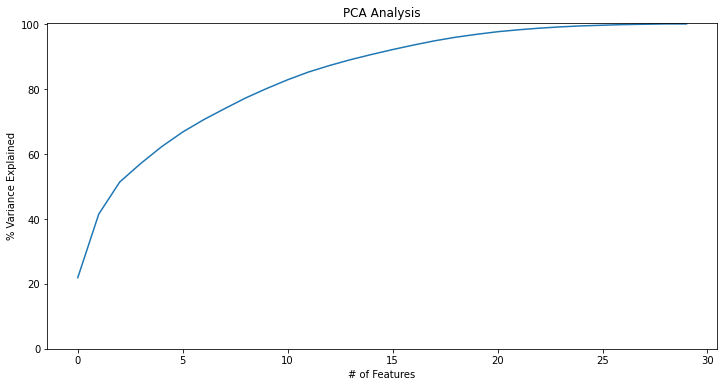

In [80]:
pca = PCA(n_components=df3.shape[1])
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 

var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### При 10 признаках дисперсия составляет 80%, поэтому будем использовать 10-компонентный PCA

In [81]:
pca = PCA(n_components=10)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3','pc4', 'pc5', 'pc6','pc7', 'pc8', 'pc9', 'pc10'])
print(pca.explained_variance_ratio_) # Процент дисперсии, объясняемой каждым из выбранных компонентов

[0.21855024 0.19647284 0.09858932 0.05692625 0.05173907 0.04480647
 0.03802105 0.03366883 0.03251162 0.02903249]


### Метод KMeans

In [82]:
model = KMeans(n_clusters=3)
model.fit(pca_df)
pred_Kmeans = model.predict(pca_df)
pd.DataFrame(y_pred)[0].value_counts()

0    78457
2    52931
1     3282
Name: 0, dtype: int64

In [83]:
df3["knn_lable"] = pred_Kmeans

In [41]:
df3.columns

Index(['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'knn_lable'],
      dtype='object')

Text(0, 0.5, 'Second Principal Component')

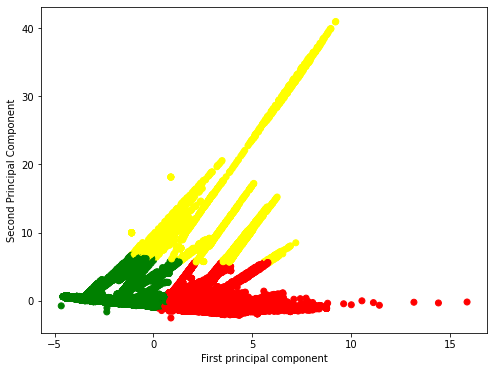

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(pca_scale[:,0], pca_scale[:,1], c=df3['knn_lable'].map({0: 'red', 1: 'green', 2:'yellow'}))

### Birch

In [21]:
%%time
from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(pca_df)
y_pred = brc.predict(pca_df)
pd.DataFrame(y_pred)[0].value_counts()

Wall time: 40.6 s


0    128248
2      6046
1       376
Name: 0, dtype: int64

In [22]:
df3["birch_lable"] = y_pred

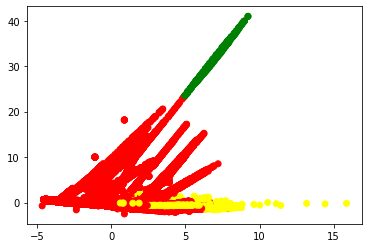

In [23]:
plt.scatter(pca_scale[:,0], pca_scale[:,1], c=df3['birch_lable'].map({0: 'red', 1: 'green', 2:'yellow'}))

### Новый DataFrame

In [84]:
temp = df.copy(deep=True)
temp = temp.drop(temp[temp['new_cases'] < 0].index)
temp = temp.drop(temp[temp['continent'].isna()].index)
temp = temp.drop(df.iloc[1292:1303].index)
temp 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134665,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134666,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134667,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134668,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [85]:
df_bot = pd.DataFrame(columns=['location', 'date', 'levels'])
df_bot['location'] = temp['location']
df_bot['date'] = pd.to_datetime(temp['date'])
df_bot['levels'] = df3['knn_lable']
df_bot

,location,date,levels
0,Afghanistan,2020-02-24,0
1,Afghanistan,2020-02-25,0
2,Afghanistan,2020-02-26,0
3,Afghanistan,2020-02-27,0
4,Afghanistan,2020-02-28,0
...,...,...,...
134665,Zimbabwe,2021-11-16,0
134666,Zimbabwe,2021-11-17,0
134667,Zimbabwe,2021-11-18,0
134668,Zimbabwe,2021-11-19,0


In [88]:
df_bot = df_bot.groupby('location')[['date','levels']].max()
df_bot

,date,levels
location,,
Afghanistan,2021-11-20,0
Albania,2021-11-20,1
Algeria,2021-11-20,0
Andorra,2021-11-20,1
Angola,2021-11-20,0
...,...,...
Vietnam,2021-11-20,0
Wallis and Futuna,2021-11-15,0
Yemen,2021-11-20,2


In [90]:
df_bot.to_csv('countries_index.csv', index=True)
df_bot.to_csv('countries.csv', index=True)